In [1]:

# Dependencies
import requests
from pprint import pprint
#from config_om import api_key
#from config_ab import api_key
from config_kr import api_key
#from config_fr import g_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import datetime

In [2]:
# Import source data
stackoverflow_file = pd.read_csv("./remote_resources/stackoverflow/2019-survey/survey_results_public_prepped.csv")
h1b1_visas_file = pd.read_csv("./remote_resources/h1b-visas/h1b18_prepped.csv", encoding= "UTF-8")

In [3]:
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?'

In [4]:
# Search parameters for articles that mention machine learning
query = "machine learning"
begin_date = "20100101"
end_date = "20191231"

In [5]:
articles_list = []

#loop through pages 0-10
for page in range(0, 10):
    query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"
     #create query with page number
    query_url = f"{query_url}&page={str(page)}"
    articles = requests.get(query_url).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(2)
    # loop through the response and append each article to the list
    for article in articles["response"]["docs"]:
        articles_list.append(article)

In [6]:
articles_list[0]

{'abstract': 'Microsoft plans to make predictive data analysis, now an arcane field, a standard part of business. The company says that a product due out in July will simplify what are now expensive, difficult processes.',
 'web_url': 'https://bits.blogs.nytimes.com/2014/06/16/microsoft-unveils-machine-learning-for-the-masses/',
 'snippet': 'Microsoft plans to make predictive data analysis, now an arcane field, a standard part of business. The company says that a product due out in July will simplify what are now expensive, difficult processes.',
 'lead_paragraph': 'Microsoft has a new strategy to win cloud business: A supposedly comprehensive predictive analysis service — and all you have to do is store your data in Azure, the Microsoft cloud.',
 'source': 'The New York Times',
 'multimedia': [{'rank': 0,
   'subtype': 'wide',
   'caption': None,
   'credit': None,
   'type': 'image',
   'url': 'images/2014/06/16/technology/16bits/16bits-thumbWide-v4.jpg',
   'height': 126,
   'width'

In [7]:
# Print the web_url of each stored article
#print("Your Reading List")
#for article in articles_list:
#    print(article["web_url"],article["pub_date"])

In [8]:
articles_list_df_raw=pd.DataFrame(articles_list)

articles_list_df = pd.DataFrame(articles_list_df_raw[['web_url', 'snippet', 'headline', 'pub_date','keywords', 'news_desk', 'uri'] ])

articles_list_df['pub_year'] = pd.DatetimeIndex(articles_list_df['pub_date']).year

articles_list_df.head()

,web_url,snippet,headline,pub_date,keywords,news_desk,uri,pub_year
0,https://bits.blogs.nytimes.com/2014/06/16/micr...,Microsoft plans to make predictive data analys...,{'main': 'Microsoft Unveils Machine Learning f...,2014-06-16T16:00:31+0000,"[{'name': 'subject', 'value': 'Cloud Computing...",Business,nyt://article/f4637d6f-8f11-5849-9153-2f20e390...,2014
1,https://bits.blogs.nytimes.com/2015/11/09/goog...,Google is making much of its machine-learning ...,{'main': 'Google Offers Free Software in Bid t...,2015-11-09T14:00:22+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",Business,nyt://article/3bfeffad-cc5e-55b9-8b5f-f118c2c8...,2015
2,https://open.blogs.nytimes.com/2016/08/09/summ...,One of our Search interns shares details about...,{'main': 'Summer Intern Report: Prototyping an...,2016-08-09T14:31:24+0000,"[{'name': 'subject', 'value': 'Internships', '...",,nyt://article/1a690f2c-ca8f-52b1-b10c-54c7fd54...,2016
3,https://www.nytimes.com/2019/12/18/education/a...,Artificial intelligence is starting to take ov...,"{'main': 'The Machines Are Learning, and So Ar...",2019-12-18T10:00:28+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",SpecialSections,nyt://article/0bf8d3d2-1fc8-560a-96c2-e416ed5f...,2019
4,https://www.nytimes.com/2018/03/08/learning/te...,Is the computer mind any easier to understand ...,{'main': 'Teaching Activities for: ‘Google Res...,2018-03-08T09:00:00+0000,[],Learning,nyt://article/1566eab5-b1e7-5248-ad79-f793e1b5...,2018


In [9]:

#Create Group By Categories
articles_list_df_raw=pd.DataFrame(articles_list)

articles_list_df = pd.DataFrame(articles_list_df_raw[['web_url', 'snippet', 'headline', 'pub_date','keywords', 'news_desk', 'uri'] ])

articles_list_df['pub_year'] = pd.DatetimeIndex(articles_list_df['pub_date']).year

articles_list_df.head()

,web_url,snippet,headline,pub_date,keywords,news_desk,uri,pub_year
0,https://bits.blogs.nytimes.com/2014/06/16/micr...,Microsoft plans to make predictive data analys...,{'main': 'Microsoft Unveils Machine Learning f...,2014-06-16T16:00:31+0000,"[{'name': 'subject', 'value': 'Cloud Computing...",Business,nyt://article/f4637d6f-8f11-5849-9153-2f20e390...,2014
1,https://bits.blogs.nytimes.com/2015/11/09/goog...,Google is making much of its machine-learning ...,{'main': 'Google Offers Free Software in Bid t...,2015-11-09T14:00:22+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",Business,nyt://article/3bfeffad-cc5e-55b9-8b5f-f118c2c8...,2015
2,https://open.blogs.nytimes.com/2016/08/09/summ...,One of our Search interns shares details about...,{'main': 'Summer Intern Report: Prototyping an...,2016-08-09T14:31:24+0000,"[{'name': 'subject', 'value': 'Internships', '...",,nyt://article/1a690f2c-ca8f-52b1-b10c-54c7fd54...,2016
3,https://www.nytimes.com/2019/12/18/education/a...,Artificial intelligence is starting to take ov...,"{'main': 'The Machines Are Learning, and So Ar...",2019-12-18T10:00:28+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",SpecialSections,nyt://article/0bf8d3d2-1fc8-560a-96c2-e416ed5f...,2019
4,https://www.nytimes.com/2018/03/08/learning/te...,Is the computer mind any easier to understand ...,{'main': 'Teaching Activities for: ‘Google Res...,2018-03-08T09:00:00+0000,[],Learning,nyt://article/1566eab5-b1e7-5248-ad79-f793e1b5...,2018


In [10]:
nyt_pub_year_grp = articles_list_df.groupby('pub_year')
nyt_news_desk_grp = articles_list_df.groupby('news_desk')

In [11]:
nyt_machine_learning_by_year_raw = pd.DataFrame(nyt_pub_year_grp['web_url'].count()).reset_index()
nyt_machine_learning_by_year = nyt_machine_learning_by_year_raw.rename(columns={'web_url':'total'})
nyt_machine_learning_by_year

,pub_year,total
0,2010,9
1,2011,5
2,2012,7
3,2013,6
4,2014,6
5,2015,16
6,2016,11
7,2017,12
8,2018,21
9,2019,7


In [12]:
nyt_machine_learning_by_news_desk_raw = pd.DataFrame(nyt_news_desk_grp['web_url'].count()).reset_index()
nyt_machine_learning_by_news_desk = nyt_machine_learning_by_news_desk_raw.rename(columns={'web_url': 'total'})
nyt_machine_learning_by_news_desk

,news_desk,total
0,,24
1,Business,32
2,Culture,1
3,Editorial,1
4,Express,1
5,Insider,1
6,Learning,9
7,Magazine,2
8,National,8
9,OpEd,6


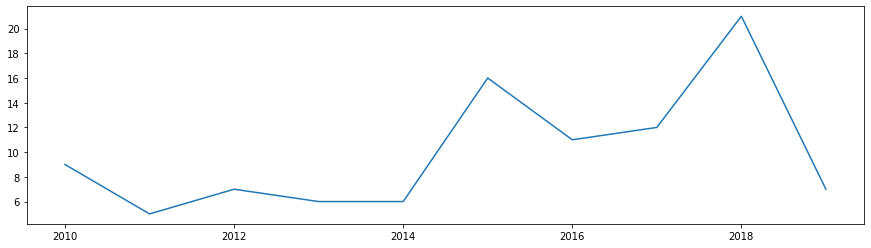

In [13]:
plt.figure(figsize=(15,4))
plt.plot(articles_list_df['pub_year'].value_counts().sort_index())



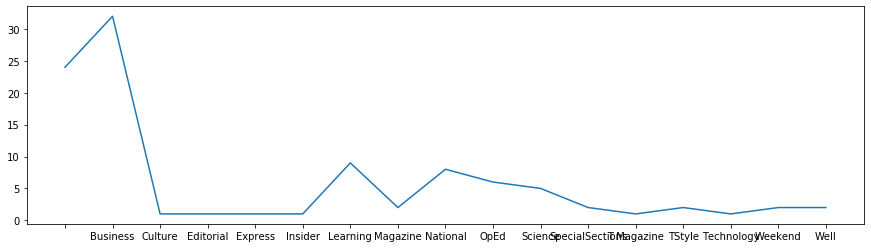

In [14]:
plt.figure(figsize=(15,4))
plt.plot(articles_list_df['news_desk'].value_counts().sort_index())

In [15]:

# Prepare Stack Overflow Survey data for analysis (Filtering to a subset of Columns)
stack_overflow_filtered_columns = stackoverflow_file[['MainBranch','Hobbyist','Employment','Country','Student','EdLevel','EduOther','OrgSize','DevType','YearsCode','YearsCodePro','CareerSat','JobSat','CompTotal','ConvertedComp','WorkWeekHrs','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','Age','Gender','Ethnicity', 'DataScienceDomain'
]]

# Isolate US based surveys, with a Data Science Domain for which the records are complete (i.e. 'NaNs' removed)
stack_overflow_filtered_USOnly = stack_overflow_filtered_columns.loc[stack_overflow_filtered_columns['Country'] == 'United States']
stack_overflow_filtered_DataScienceDomain_USOnly = stack_overflow_filtered_USOnly.loc[stack_overflow_filtered_USOnly['DataScienceDomain'] == True]
stack_overflow_df = pd.DataFrame(stack_overflow_filtered_DataScienceDomain_USOnly.dropna())
#stack_overflow_coasts_df_raw = stack_overflow_df.loc[(stack_overflow_df == 'NY') | (stack_overflow_df == 'NJ') | (stack_overflow_df == 'CA') | (stack_overflow_df == 'WA')].reset_index()
#stack_overflow_coasts_df_raw["Coast"] = stack_overflow_coasts_df_raw['EMPLOYER_STATE']
#stack_overflow_coasts_df_raw.rest_index()
#stack_overflow_coasts_df = stack_overflow_df_raw["Coast"].replace({'NY': 'East Coast', 'NJ': 'East Coast', 'CA': 'West Coast', 'WA': 'West Coast'}) 
stack_overflow_df.count()
#stack_overflow_coasts_df.count()

MainBranch                1897
Hobbyist                  1897
Employment                1897
Country                   1897
Student                   1897
EdLevel                   1897
EduOther                  1897
OrgSize                   1897
DevType                   1897
YearsCode                 1897
YearsCodePro              1897
CareerSat                 1897
JobSat                    1897
CompTotal                 1897
ConvertedComp             1897
WorkWeekHrs               1897
LanguageWorkedWith        1897
LanguageDesireNextYear    1897
DatabaseWorkedWith        1897
DatabaseDesireNextYear    1897
PlatformWorkedWith        1897
PlatformDesireNextYear    1897
Age                       1897
Gender                    1897
Ethnicity                 1897
DataScienceDomain         1897
dtype: int64

In [16]:
# Define Categories for Analysis
# group by education level
so_groupby_edu = stack_overflow_df.groupby('EdLevel') 

# group by gender
so_groupby_gender = stack_overflow_df.groupby('Gender')

so_groupby_devtype = stack_overflow_df.groupby('DevType')

so_groupby_age = stack_overflow_df.groupby('Age')

so_groupby_emp = stack_overflow_df.groupby('Employment')

so_groupby_mainbranch = stack_overflow_df.groupby('MainBranch')

so_groupby_degree_DevType = stack_overflow_df.groupby(['EdLevel','DevType'] ).agg({'Age': ['count']})


In [17]:
print(stack_overflow_df['EdLevel'].unique())
print("-----------------------------------------------"*2)
print(stack_overflow_df['DevType'].unique())

['Master’s degree (MA, MS, M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree' 'Professional degree (JD, MD, etc.)'
 'I never completed any formal education' 'Primary/elementary school']
----------------------------------------------------------------------------------------------
['Data or business analyst;Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;DevOps specialist;Engineer, data;Engineer, site reliability;Engineering manager;Senior executive/VP;System administrator'
 'Data or business analyst;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;DevOps specialist;System administrator'
 'Developer, 

In [18]:
so_groupby_mainbranch['Gender'].count()
print(so_groupby_edu['Gender'].count())
print("-----------------------------------------------"*2)

EdLevel
Associate degree                                                                       69
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              940
I never completed any formal education                                                  7
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           477
Other doctoral degree (Ph.D, Ed.D., etc.)                                             145
Primary/elementary school                                                               7
Professional degree (JD, MD, etc.)                                                      7
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     38
Some college/university study without earning a degree                                207
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------


In [19]:
stack_overflow_educlean_df = stack_overflow_df['EdLevel'].replace({'Master’s degree (MA, MS, M.Eng., MBA, etc.)':"Masters",
       'Some college/university study without earning a degree':'Non Degree',
       'Bachelor’s degree (BA, BS, B.Eng., etc.)':'Bachelors',
       'Other doctoral degree (Ph.D, Ed.D., etc.)':'Doctoral',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Non Degree',
       'Associate degree':'Associates', 'Professional degree (JD, MD, etc.)':'Masters',
       'I never completed any formal education':'Non Degree',
       'Primary/elementary school':'Non Degree'}).reset_index()

In [20]:
so_unique_edulevel_df = pd.DataFrame(stack_overflow_educlean_df['EdLevel'].unique()).reset_index()

In [21]:
del so_unique_edulevel_df['index']

In [22]:
so_unique_edulevel_rename_column_df = so_unique_edulevel_df.rename(columns={'0':'EdLevel'})

In [23]:
so_unique_edulevel_df.rename(columns={0:'EdLevel'})

,EdLevel
0,Masters
1,Non Degree
2,Bachelors
3,Doctoral
4,Associates


In [24]:
edulevel_clean_grp = stack_overflow_educlean_df.groupby('EdLevel')

so_counts_by_edulevel = edulevel_clean_grp['index'].count().reset_index()

In [25]:
#create pie chart 
#Labels for the sections of our pie chart
labels = []
for label in (so_unique_edulevel_df[0]):
    labels.append(label)

print(labels)

['Masters', 'Non Degree', 'Bachelors', 'Doctoral', 'Associates']


In [26]:
# The values of each section of the pie chart
sizes = []
for size in (so_counts_by_edulevel['index']):
    sizes.append(size)
    
print(sizes)

[69, 940, 145, 484, 259]


In [27]:
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow"]

In [28]:
# Tells matplotlib to seperate the "Never Completed Formal Education" section from the others
explode = (0.1, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x1114c0a2348>,
 [Text(-1.0012080319316798, 0.6615001714251422, 'Masters'),
  Text(-0.511533202823874, -0.9738243077725826, 'Non Degree'),
  Text(1.0637009341138768, -0.28025046434442596, 'Bachelors'),
  Text(0.7788543303656831, 0.7767792041955188, 'Doctoral'),
  Text(-0.4722511526660379, 0.9934680914883973, 'Associates')],
 [Text(-0.5840380186268133, 0.3858750999979995, '3.6%'),
  Text(-0.279018110631204, -0.5311768951486813, '49.6%'),
  Text(0.5802005095166599, -0.15286388964241412, '7.6%'),
  Text(0.42482963474491797, 0.4236977477430102, '25.5%'),
  Text(-0.25759153781783883, 0.5418916862663985, '13.7%')])

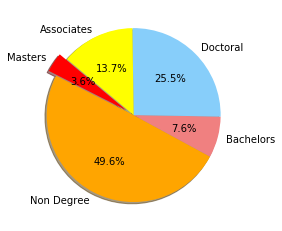

In [29]:
# find % for each label charted 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [30]:
h1b1_visas_file_filtered_columns = h1b1_visas_file[['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'EMPLOYER_NAME', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE', 'JOB_TITLE', 'SOC_NAME', 'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'WAGE_RATE_OF_PAY_FROM','Domain', 'Role' ]]
h1b1_visas_file_certified = h1b1_visas_file_filtered_columns.loc[h1b1_visas_file_filtered_columns['CASE_STATUS']=='CERTIFIED']
h1b1_visas_file_certified_dropna = h1b1_visas_file_certified.dropna()
h1b1_visas_file_certified_year = h1b1_visas_file_certified_dropna.loc[h1b1_visas_file_certified_dropna['PW_UNIT_OF_PAY'] == 'Year']

In [31]:
h1b1_visas_data_science = pd.DataFrame(h1b1_visas_file_certified_year.loc[h1b1_visas_file_certified_year['Domain'] == 'Data Science'])
#df["A"] = pd.to_numeric(df["A"], downcast="float")
h1b1_visas_data_science['PREVAILING_WAGE'] = pd.to_numeric(h1b1_visas_data_science['PREVAILING_WAGE'], downcast = 'float', errors ='ignore')

h1b1_visas_data_science.count()

CASE_STATUS              10730
CASE_SUBMITTED           10730
DECISION_DATE            10730
EMPLOYER_NAME            10730
EMPLOYER_CITY            10730
EMPLOYER_STATE           10730
EMPLOYER_POSTAL_CODE     10730
JOB_TITLE                10730
SOC_NAME                 10730
FULL_TIME_POSITION       10730
PREVAILING_WAGE          10730
PW_UNIT_OF_PAY           10730
WAGE_RATE_OF_PAY_FROM    10730
Domain                   10730
Role                     10730
dtype: int64

In [32]:

grp_data_science_role = h1b1_visas_data_science.groupby('Role')
grp_data_science_state = h1b1_visas_data_science.groupby('EMPLOYER_STATE')
grp_data_science_state_and_role = h1b1_visas_data_science.groupby(['EMPLOYER_STATE', 'Role'])

In [33]:
h1b1_avg_salary_by_state_and_role = pd.DataFrame(grp_data_science_state_and_role['PREVAILING_WAGE'].mean()).reset_index()

In [34]:
h1b1_avg_salary_ny = h1b1_avg_salary_by_state_and_role.loc[h1b1_avg_salary_by_state_and_role['EMPLOYER_STATE'] == 'NY']
h1b1_avg_salary_nj = h1b1_avg_salary_by_state_and_role.loc[h1b1_avg_salary_by_state_and_role['EMPLOYER_STATE'] == 'NJ']
h1b1_avg_salary_ca = h1b1_avg_salary_by_state_and_role.loc[h1b1_avg_salary_by_state_and_role['EMPLOYER_STATE'] == 'CA']

In [35]:
roles = []
for role in (h1b1_avg_salary_ny['Role']):
    roles.append(role)

In [36]:
salary = []
for sal in (h1b1_avg_salary_ny['PREVAILING_WAGE']):
    salary.append(sal)

Text(0, 0.5, 'Average Salary')

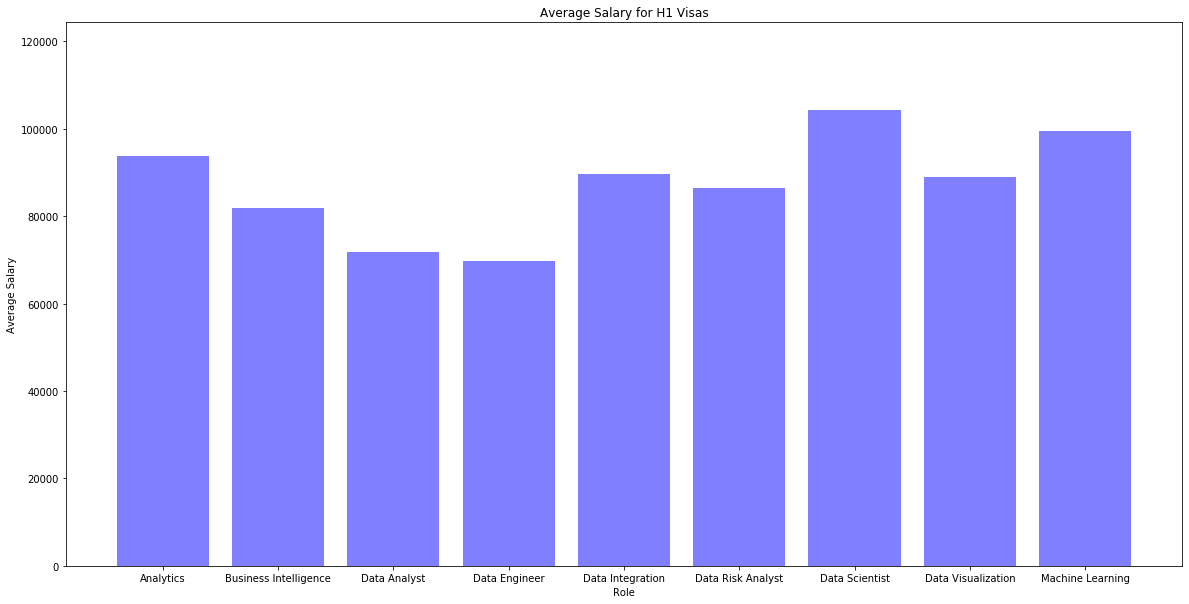

In [37]:
x_axis = np.arange(len(roles))
plt.figure(figsize=(20,10))
plt.bar(x_axis, salary, color='blue', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, roles, rotation="horizontal")
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(salary)+20000)

# Give our chart some labels and a tile
plt.title("Average Salary for H1 Visas")
plt.xlabel("Role")
plt.ylabel("Average Salary")

In [38]:
h1b1_counts_by_state_and_role = pd.DataFrame(grp_data_science_state_and_role['PREVAILING_WAGE'].count()).reset_index()

In [39]:
h1b1_counts_by_state_and_role_ny = h1b1_counts_by_state_and_role.loc[h1b1_counts_by_state_and_role['EMPLOYER_STATE'] == 'NY']
h1b1_counts_by_state_and_role_nj = h1b1_counts_by_state_and_role.loc[h1b1_counts_by_state_and_role['EMPLOYER_STATE'] == 'NJ']
h1b1_counts_by_state_and_role_ca = h1b1_counts_by_state_and_role.loc[h1b1_counts_by_state_and_role['EMPLOYER_STATE'] == 'CA']

In [40]:
roles = []
for role in (h1b1_counts_by_state_and_role_ny['Role']):
    roles.append(role)

In [41]:
counts = []
for count in (h1b1_counts_by_state_and_role_ny['PREVAILING_WAGE']):
    counts.append(count)

Text(0, 0.5, 'Number of H1 Visas')

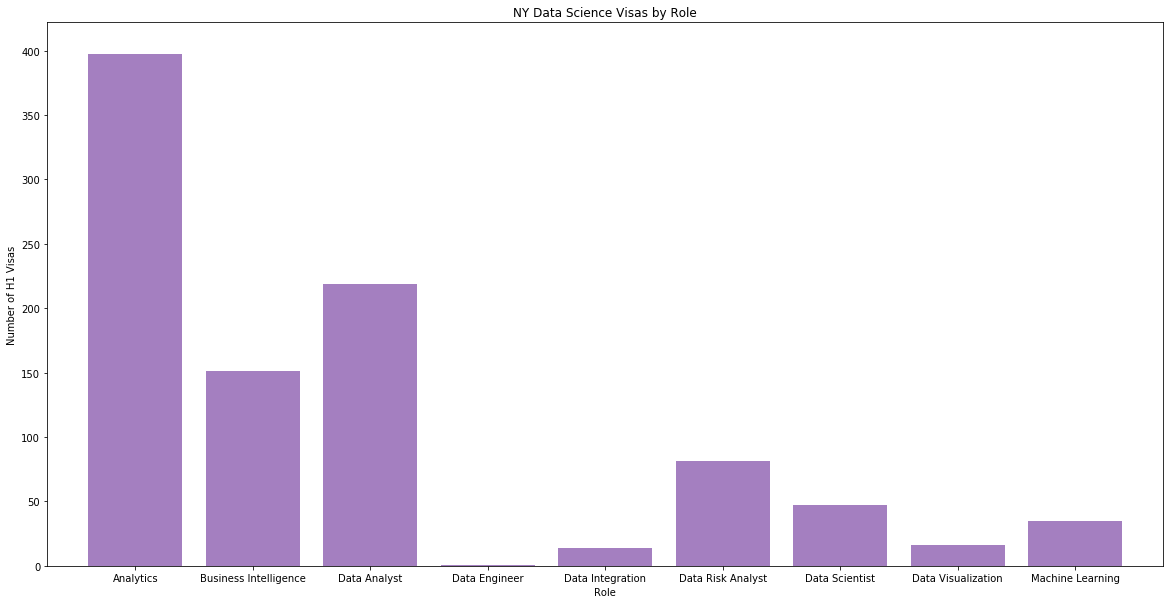

In [42]:

x_axis = np.arange(len(roles))
plt.figure(figsize=(20,10))
plt.bar(x_axis, counts, color='indigo', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, roles)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(counts)+25)

# Give our chart some labels and a tile
plt.title("NY Data Science Visas by Role")
plt.xlabel("Role")
plt.ylabel("Number of H1 Visas")